In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv("https://api.covid19india.org/csv/latest/states.csv", index_col = 'Date', parse_dates = True)
state = input("State: ")
data = df[df["State"] == state]
con = data[['Confirmed']]
con

State: Maharashtra


,Confirmed
Date,
2020-03-09,2
2020-03-10,5
2020-03-11,11
2020-03-12,14
2020-03-13,17
...,...
2021-01-19,1994977
2021-01-20,1997992
2021-01-21,2000878


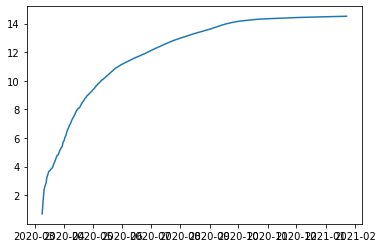

In [3]:
lncon = np.log(con)
lncon
plt.plot(lncon)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:655: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<Figure size 4320x720 with 0 Axes>

<Figure size 4320x720 with 0 Axes>

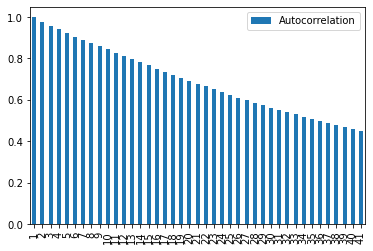

In [4]:
plt.figure(figsize = (60,10))
a = acf(lncon)
test_df = pd.DataFrame([a]).T

test_df.columns = ['Autocorrelation']
plt.figure(figsize = (60,10))
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:655: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1022: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


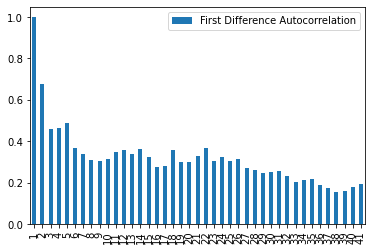

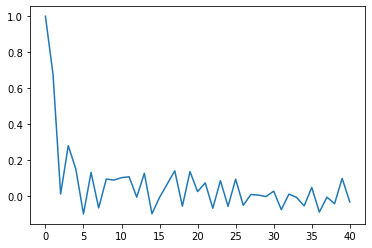

In [5]:
result = ts.adfuller(lncon, 1)
result
lncon_diff = lncon-lncon.shift()
diff = lncon_diff.dropna()
a_diff = acf(diff)
test_df = pd.DataFrame([a_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
p_diff = pacf(diff)
plt.figure()
plt.plot(p_diff)
plt.show()

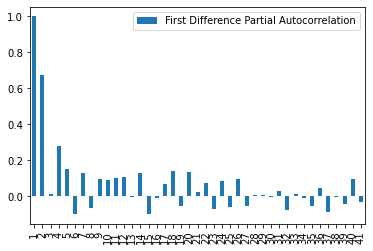

In [6]:
test_df = pd.DataFrame([p_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=2012623.850000
predicted=2018893.700000
predicted=2025163.550000
predicted=2031433.400000
predicted=2037703.250000
predicted=2043973.100000
predicted=2050242.950000
predicted=2056512.800000
predicted=2062782.650000
predicted=2069052.500000
predicted=2075322.350000
predicted=2081592.200000
predicted=2087862.050000
predicted=2094131.900000
predicted=2100401.750000
predicted=2106671.600000
predicted=2112941.450000
predicted=2119211.300000
predicted=2125481.150000
predicted=2131751.000000


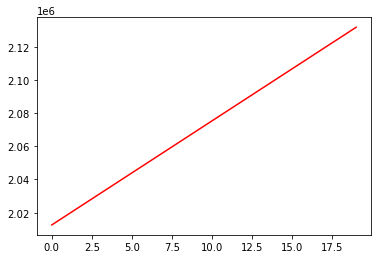

In [7]:
X = con.values
X = X.astype('float32')
history = [x for x in X]
predictions = list()
for t in range(20):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=2012623.850000
predicted=2018893.700000
predicted=2025163.550000
predicted=2031433.400000
predicted=2037703.250000
predicted=2043973.100000
predicted=2050242.950000
predicted=2056512.800000
predicted=2062782.650000
predicted=2069052.500000
predicted=2075322.350000
predicted=2081592.200000
predicted=2087862.050000
predicted=2094131.900000
predicted=2100401.750000
predicted=2106671.600000
predicted=2112941.450000
predicted=2119211.300000
predicted=2125481.150000
predicted=2131751.000000
predicted=2138020.850000
predicted=2144290.700000
predicted=2150560.550000
predicted=2156830.400000
predicted=2163100.250000
predicted=2169370.100000
predicted=2175639.950000
predicted=2181909.800000
predicted=2188179.650000
predicted=2194449.500000


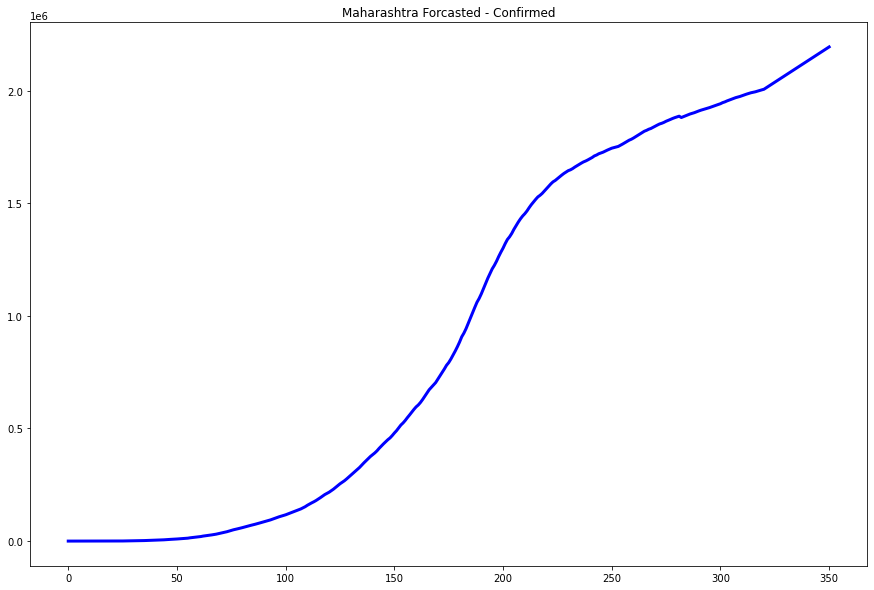

<Figure size 432x288 with 0 Axes>

In [8]:
X = con.values
X = X.astype('float32')
history = [x for x in X]
predictions = list()
for t in range(30):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'blue', lw = 3)
plt.title(state + ' Forcasted - Confirmed')
plt.show()
plt.savefig("Confirmed.png")

predicted=1916491.378125
predicted=1922461.756250
predicted=1928432.134375
predicted=1934402.512500
predicted=1940372.890625
predicted=1946343.268750
predicted=1952313.646875
predicted=1958284.025000
predicted=1964254.403125
predicted=1970224.781250
predicted=1976195.159375
predicted=1982165.537500
predicted=1988135.915625
predicted=1994106.293750
predicted=2000076.671875
predicted=2006047.050000
predicted=2012017.428125
predicted=2017987.806250
predicted=2023958.184375
predicted=2029928.562500
predicted=2035898.940625
predicted=2041869.318750
predicted=2047839.696875
predicted=2053810.075000
predicted=2059780.453125
predicted=2065750.831250
predicted=2071721.209375
predicted=2077691.587500
predicted=2083661.965625
predicted=2089632.343750


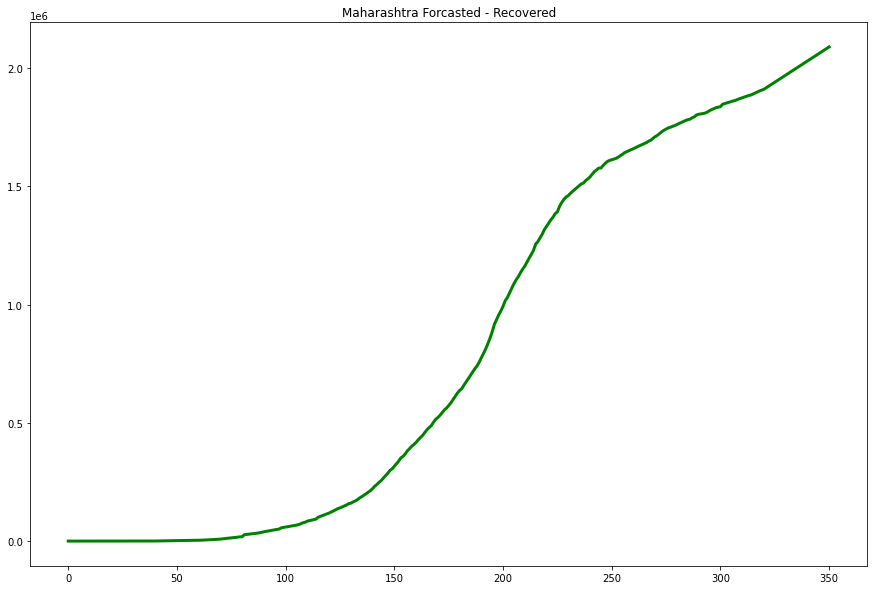

<Figure size 432x288 with 0 Axes>

In [9]:
rec = data[['Recovered']]
X = rec.values
X = X.astype('float32')
history = [x for x in X]
predictions = list()
for t in range(30):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'green', lw = 3)
plt.title(state + ' Forcasted - Recovered')
plt.show()
plt.savefig("Recovered.png")

predicted=50898.562500
predicted=51057.125000
predicted=51215.687500
predicted=51374.250000
predicted=51532.812500
predicted=51691.375000
predicted=51849.937500
predicted=52008.500000
predicted=52167.062500
predicted=52325.625004
predicted=52484.187504
predicted=52642.750004
predicted=52801.312504
predicted=52959.875004
predicted=53118.437504
predicted=53277.000004
predicted=53435.562504
predicted=53594.125004
predicted=53752.687504
predicted=53911.250004
predicted=54069.812504
predicted=54228.375004
predicted=54386.937504
predicted=54545.500004
predicted=54704.062504
predicted=54862.625004
predicted=55021.187504
predicted=55179.750004
predicted=55338.312504
predicted=55496.875004


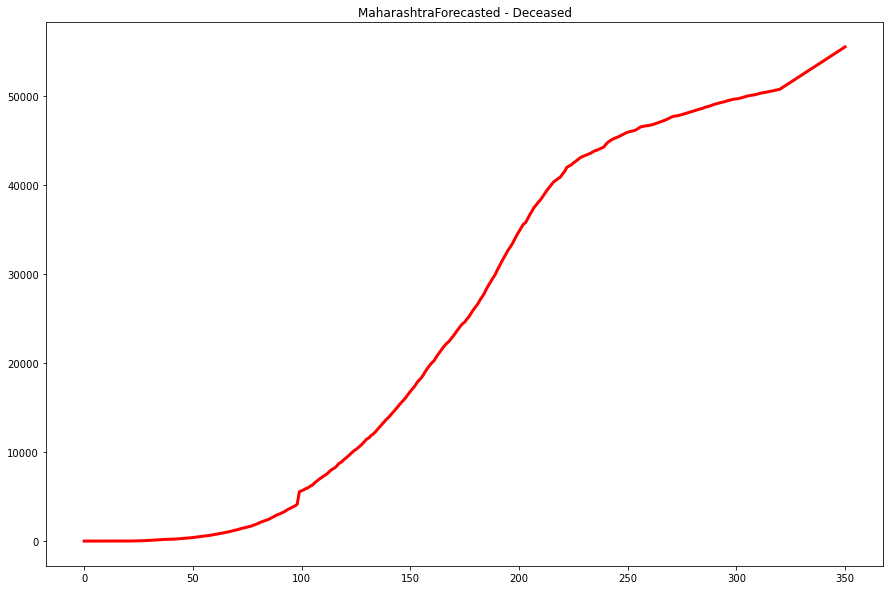

<Figure size 432x288 with 0 Axes>

In [10]:
dec = data[['Deceased']]
X = dec.values
X = X.astype('float32')
history = [x for x in X]
predictions = list()
for t in range(30):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'red', lw = 3)
plt.title(state + 'Forecasted - Deceased')
plt.show()
plt.savefig("Deceased.png")